In [2]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('training_data.csv', delimiter=':')
train_data.describe()

,x,x2,y
count,998.000000,998.000000,998.000000
mean,3.496300,34.963000,5.641535
std,3.270797,32.707971,2.696431
min,-3.444108,-34.441079,-0.075518
25%,0.118074,1.180740,3.432217
50%,4.011380,40.113800,5.081093
75%,6.306373,63.063733,8.294083
max,9.846538,98.465379,11.521694


In [6]:
corr_matrix = train_data.corr()
corr_matrix['y'].sort_values(ascending=True)

x     0.837319
x2    0.837319
y     1.000000
Name: y, dtype: float64

In [7]:
train_data.isna().sum()

x     2
x2    2
y     2
dtype: int64

In [8]:
training_data = train_data.fillna(np.mean(train_data))

In [9]:
training_data.isnull().sum()

x     0
x2    0
y     0
dtype: int64

In [10]:
features = ['x']
target = ['y']
x_train = training_data[features]
y_train = training_data[target]

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y = model.predict([[3.5]])
y

c:\Users\Ashu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.64668846]])

In [14]:
model.coef_

array([[0.69299657]])

In [15]:
model.intercept_

array([3.22120046])

In [16]:
y = model.intercept_ + model.coef_ * x_train

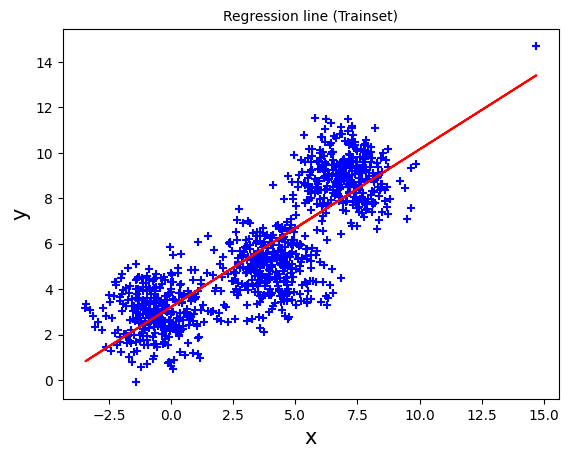

In [17]:
# plotting on training data
plt.scatter(x_train, y_train, color='blue', marker='+')
plt.plot(x_train, y, color='red')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Regression line (Trainset)', fontsize=10)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
predict_value = model.predict(training_data[features])
mse = mean_squared_error(training_data[target], predict_value)
mse

2.1700994307695356

In [19]:
rmse = np.sqrt(mse)
rmse

1.4731257348812883